<h1>Mall Customers<h1>

<h5>Segmentazione dei clienti utilizzando l'algoritmo di machine learning (clustering K-Means) in Python nel modo più semplice ed trovare chi sono i target con i quali è possibile iniziare una strategia di marketing.</h5>

In [15]:
#Creo il DataFrame dal csv 'Mall_Customers.csv'
import pandas as pd

df_customers = pd.read_csv('Mall_Customers.csv')
df_customers


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<h2>Data Processing</h2>

<h4>1 - Controllo del valori mancanti</h4>

In [16]:
#Controllo se ci sono valori 'Nan' (mancanti nel DataFrame)
print(df_customers.isnull().sum())

#Nessuna colonna presenta valori mancanti

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<h4>2 - Trasformazione della feature categorica 'Gender' in numerica</h4>

In [17]:
#Per la trasformazione della feature categorica 'Gender' in numerica Mappo i valori 'Male' a 
#1 e 'Female' a 0 nella colonna 'Gender'

df_customers['Gender'] = df_customers['Gender'].map({'Male': 1, 'Female': 0})
df_customers

#Così la colonna 'Gender' risulta:
#Male -- > 1
#Female -- >0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


<h4>3 - Eliminazione della colonna 'CustomerID'</h4>

In [18]:
#La colonna 'CustomerID' non è rilevante per la segmentazione dei clienti e non ha alcun valore 
#informativo per l'analisi. La presenza o l'assenza di questa colonna non influenzerà 
#le operazioni successive di analisi

df_customers = df_customers.drop('CustomerID', axis=1)
df_customers


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


<h2>Segmentazione dei clienti</h2>

In [19]:
#Segmentazione dei clienti utilizzando l'algoritmo di clustering K-Means.

#L'algoritmo di clustering K-Means è un algoritmo di apprendimento non supervisionato che 
#raggruppa i dati in base alle loro caratteristiche simili, senza l'utilizzo di un target 
#specifico.

<h4>1 - Seleziono le feature rilevanti per la segmentazione</h4>

In [20]:
#In questo caso seleziono tutte le features del DataFrame
X = df_customers[['Gender' ,'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

<h4>2 - Determinazione del numero ottimale di cluster </h4>

c:\Users\elisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


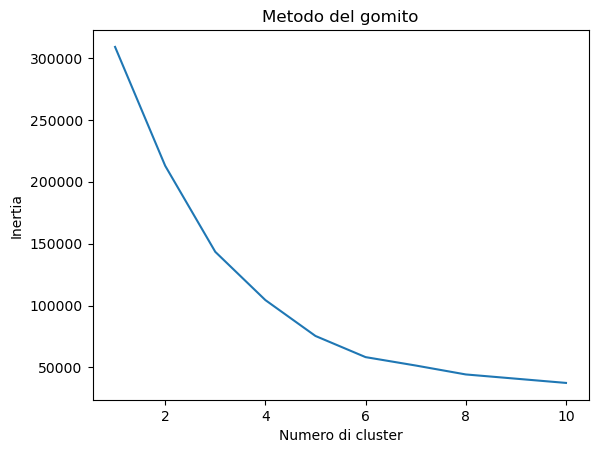

In [21]:
#Utilizzo il metodo del gomito (elbow method)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#Inizializzo una lista per salvare i valori dell'inertia (somma dei quadrati delle distanze 
#all'interno di ogni cluster)
inertia = []

#Provo un numero di cluster compreso tra 1 e 10
for k in range(1, 11):
    #Creo un'istanza del modello K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    #Addestro il modello sulle features selezionate
    kmeans.fit(X)
    #Salvo l'inertia del modello
    inertia.append(kmeans.inertia_)

#Traccio il grafico dell'inertia per valutare il punto di flessione (gomito)
plt.plot(range(1, 11), inertia)
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.title('Metodo del gomito')
plt.show()

#In questo grafico indica che l'inertia diminuisce man mano che il numero di cluster aumenta. 
#Quindi, aggiungendo più cluster, l'inertia complessiva diminuisce, indicando una maggiore 
#compattazione dei cluster.


<h4>3 - Addestramento del modello K-Means </h4>

In [22]:
#Scelgo il numero ottimale di cluster in base all'analisi del gomito
n_clusters = 5 #-- > Corrisponde al gomito della curva

#Creo un'istanza del modello K-Means con il numero di cluster scelto
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#Addestro il modello sulle feature selezionate
kmeans.fit(X)

#Aggiungo le etichette dei cluster al DataFrame originale
df_customers['Cluster'] = kmeans.labels_
df_customers

#La nuova colonna 'Cluster', con i suoi corrispondenti valori, consente di identificare a quale 
#Cluster appartiene ciascun cliente.


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


<h2>Identificazione dei target con i quali è possibile iniziare una strategia di marketing.</h2>

<h4>1 - Analisi delle caratteristiche dei Cluster </h4>

In [23]:
#Calcolo le statistiche per ciascuna variabile chiave all'interno di ogni Cluster. 
#Calcolando la media, la mediana o il valore massimo e minimo per l'età, il reddito annuale e 
#il punteggio di spesa di ciascun Cluster.
cluster_stats = df_customers.groupby(['Cluster', 'Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_stats

#Dall'analisi statistica fornita, i Cluster sono 5 classi (dalla 0 alla 4) che, 
#all'interno dei quali sono raggruppati i vari 'Customers' in base a determinate caratteristiche 
#comuni, ad esempio:
#nella classe 'Cluster' 4 l'età media dei clienti (sia femmine che maschi) è di 25 anni, hanno
#il reddito annuale più basso ma sono quelli che spendono di più.
#Diciamo che le persone in quella fascia di età sono ai primi approcci lavorativi 
#(stage, apprendistati) quindi è comune che guadagnino poco in quanto vivono ancora con i loro
#genitori ma spendono di più rispetto alle altre fascie d'età perché hanno molti più bisogni:
#vestiti di marca, telefono ultimo modello, biggiotteria. Le donne spendono di più in questa
#fascia d'età

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                       
0       0       43.214286           27.357143               21.714286
        1       48.333333           24.666667               19.666667
1       0       32.190476           86.047619               81.666667
        1       33.277778           87.111111               82.666667
2       0       41.388889           89.055556               23.722222
        1       39.315789           85.894737               12.947368
3       0       41.521739           54.543478               49.521739
        1       45.363636           55.212121               50.272727
4       0       25.461538           25.692308               80.538462
        1       25.000000           25.777778               77.666667

In [24]:
#Ora anlizzo i Cluster con alto reddito

threshold_income = 80  #Definisco il valore di soglia per il reddito annuale
threshold_spending = 70  #Definisco il di soglia per il punteggio di spesa

high_income_high_spending_clusters = cluster_stats[
    (cluster_stats['Annual Income (k$)'] > threshold_income) &
    (cluster_stats['Spending Score (1-100)'] > threshold_spending)
]

high_income_high_spending_clusters

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Gender                                                       
1       0       32.190476           86.047619               81.666667
        1       33.277778           87.111111               82.666667

In [25]:
#La strategia di marketing per le persone appartenenti al Cluster con alto reddito (Cluster 1)

#"Esclusivo. Lussuoso. Elegante. Benvenuti nel mondo dei nostri prodotti di fascia alta, dove 
#la qualità e il prestigio si fondono in un'esperienza senza precedenti. I nostri prodotti sono 
#il risultato di un'attenzione meticolosa ai dettagli, un design innovativo e un artigianato 
#di prima qualità. Ogni elemento è realizzato con cura per offrirvi una sensazione di lusso 
#che rispecchia il vostro stile di vita raffinato. Ci dedichiamo a offrire prodotti esclusivi 
#che sono veri tesori di unicità. La personalizzazione è al centro di tutto ciò che facciamo, 
#permettendovi di creare un prodotto su misura che rispecchia perfettamente i vostri gusti e le 
#vostre preferenze. Il vostro desiderio di differenziarvi è la nostra ispirazione. Con i nostri 
#prodotti, vi immergerete in un'esperienza superiore. Ogni dettaglio è stato curato per offrire 
#comfort, prestazioni straordinarie e un senso di gratificazione. Vi invitiamo a sperimentare la 
#sensazione di un prodotto di alta qualità che supera le vostre aspettative. Non si tratta solo 
#di un prodotto, ma di una dichiarazione di stile e raffinatezza. Il nostro packaging elegante 
#aggiunge un tocco di classe all'esperienza, creando un'atmosfera di anticipazione mentre aprite 
#il nostro scrigno di lusso. La soddisfazione dei nostri clienti è la nostra priorità assoluta. 
#I loro racconti di successo testimoniano l'efficacia dei nostri prodotti e il nostro impegno a 
#offrire un'esperienza senza paragoni. Vogliamo essere il vostro compagno nel raggiungimento dei 
#vostri obiettivi di stile e di vita. Se cercate prodotti di fascia alta che trasmettano 
#eleganza, prestigio e un senso di unicità, siamo qui per voi. Unisciti a noi nel mondo 
#dell'eccellenza e scopri l'arte del lusso."